In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from scipy.stats import randint as sp_randint, uniform as sp_uniform
import lightgbm as lgb
from xgboost import XGBRFRegressor, XGBRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA

In [63]:
pd.set_option('display.max_columns', None)

In [64]:
train = pd.read_csv('train_events_eco.csv')
train.head()

,Year,Month,ProductCategory,Sales,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports
0,2009,1,WomenClothing,1755.0,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55
1,2009,1,MenClothing,524.0,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55
2,2009,1,OtherClothing,936.0,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55
3,2009,2,WomenClothing,1729.0,1.0,1.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.10
4,2009,2,MenClothing,496.0,1.0,1.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.10


In [65]:
test = pd.read_csv('test_events_eco.csv')
test.head()

,Year,Month,ProductCategory,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports
0,2014,1,WomenClothing,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.58,9.75
1,2014,1,MenClothing,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.58,9.75
2,2014,1,OtherClothing,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.58,9.75
3,2014,2,WomenClothing,1.0,1.0,17028.586348,15762.598920,259.019,6.7,11.83,10.09,24.58,0.9405,3.40,10.206,7.465,807,12.551,3.58,9.75
4,2014,2,MenClothing,1.0,1.0,17028.586348,15762.598920,259.019,6.7,11.83,10.09,24.58,0.9405,3.40,10.206,7.465,807,12.551,3.58,9.75


In [66]:
weather_2009 = pd.read_excel('WeatherData.xlsx', sheet_name = 0)
print(weather_2009.shape)
weather_2009.head()

(365, 23)


,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,-3,-6,-9,-16,-17,-19,54,43,32,1025,1023,1015,16,16,16,37,18,60,0,NaN
1,2009,Jan,2,1,-2,-5,-3,-7,-17,78,57,36,1022,1012,1007,16,13,2,27,10,48,T,Snow
2,2009,Jan,3,3,1,-2,-5,-9,-13,72,54,35,1018,1015,1008,16,16,16,27,16,42,T,NaN
3,2009,Jan,4,6,1,-4,-10,-12,-13,55,42,29,1020,1017,1015,16,16,16,32,12,40,0,NaN
4,2009,Jan,5,6,5,3,-1,-5,-16,62,48,33,1016,1014,1013,16,16,16,23,11,34,T,NaN


In [67]:
weather_2010 = pd.read_excel('WeatherData.xlsx', sheet_name = 1)
print(weather_2010.shape)
weather_2010.head()

(365, 23)


,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,4,3,1,1,0,-3,100,85,70,1016,1012,1006,16,10,3,26,5,35,0.76,Snow
1,2009,Jan,2,1,-3,-8,-4,-10,-16,85,68,50,1006,1005,1003,16,14,2,35,20,56,0.51,Snow
2,2009,Jan,3,-6,-7,-8,-12,-14,-16,67,56,45,1004,1000,998,16,15,3,42,23,63,T,Snow
3,2009,Jan,4,-1,-4,-7,-11,-12,-13,62,53,43,1007,1006,1004,16,16,16,27,17,39,0,NaN
4,2009,Jan,5,-1,-4,-7,-10,-11,-13,65,56,47,1007,1006,1005,16,16,16,27,16,39,T,NaN


In [68]:
weather_2011 = pd.read_excel('WeatherData.xlsx', sheet_name = 2)
print(weather_2011.shape)
weather_2011.head()

(365, 23)


,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,12,8,4,8,2,-2,83,67,50,1021,1018,1015,11,10,8,19,5,26,0,NaN
1,2009,Jan,2,11,7,2,9,5,-7,100,73,45,1015,1014,1011,16,9,1,32,8,45,0.25,"Fog , Rain"
2,2009,Jan,3,2,0,-2,-8,-11,-13,53,44,35,1022,1020,1015,16,16,16,34,14,48,0,NaN
3,2009,Jan,4,4,2,0,-7,-9,-11,52,47,40,1020,1014,1009,16,16,13,16,10,29,0,NaN
4,2009,Jan,5,4,1,-2,-6,-8,-12,61,50,39,1012,1010,1009,16,16,16,24,10,32,0,NaN


In [69]:
weather_2012 = pd.read_excel('WeatherData.xlsx', sheet_name = 3)
print(weather_2012.shape)
weather_2012.head()

(366, 23)


,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,11,8,5,8,4,3,82,71,59,1020,1013,1005,16,16,10,24,10,35,1.27,Rain
1,2009,Jan,2,10,6,1,4,-7,-9,74,56,37,1010,1007,1005,16,16,16,40,17,52,0,NaN
2,2009,Jan,3,1,-4,-9,-6,-13,-18,69,54,38,1021,1014,1009,16,16,16,32,17,48,0,NaN
3,2009,Jan,4,-3,-7,-11,-11,-16,-19,61,47,32,1024,1020,1015,16,16,16,26,12,35,0,NaN
4,2009,Jan,5,4,1,-3,-6,-8,-11,56,50,44,1015,1013,1010,16,16,16,26,10,35,0,NaN


In [70]:
weather_2013 = pd.read_excel('WeatherData.xlsx', sheet_name = 4)
print(weather_2013.shape)
weather_2013.head()

(365, 23)


,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,4,1,-3,-3,-6,-13,64,54,44,1016,1012,1010,16,16,16,24,11,42,0,NaN
1,2009,Jan,2,1,-2,-6,-9,-12,-13,57,48,39,1022,1018,1016,16,16,16,24,9,35,0,NaN
2,2009,Jan,3,0,-2,-4,-8,-10,-11,68,56,43,1022,1020,1018,16,16,16,21,7,32,0,NaN
3,2009,Jan,4,3,1,-1,-6,-7,-8,63,56,48,1019,1016,1014,16,16,16,29,13,45,0,NaN
4,2009,Jan,5,6,3,0,-6,-7,-9,56,48,39,1025,1022,1016,16,16,16,27,11,42,0,NaN


In [71]:
weather_2014 = pd.read_excel('WeatherData.xlsx', sheet_name = 5)
print(weather_2014.shape)
weather_2014.head()

(364, 23)


,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,2,1,-2,-4,-7,-11,-15,59,49,38,1029,1027,1025,16,16,16,23,9,37,0,NaN
1,2009,Jan,3,1,-3,-8,-5,-7,-10,84,70,56,1023,1015,1005,16,12,1,34,20,45,8.38,"Fog , Snow"
2,2009,Jan,4,-8,-10,-13,-11,-17,-22,84,63,42,1032,1018,1004,16,9,0,34,17,47,7.37,Snow
3,2009,Jan,5,-2,-7,-13,-9,-16,-21,66,51,35,1034,1030,1026,16,16,16,14,8,32,0,NaN
4,2009,Jan,6,4,1,-3,3,-3,-8,92,75,58,1027,1023,1010,16,5,0,11,6,27,3.56,"Fog , Rain"


In [72]:
weather_2009['Year'] = 2009
weather_2010['Year'] = 2010
weather_2011['Year'] = 2011
weather_2012['Year'] = 2012
weather_2013['Year'] = 2013
weather_2014['Year'] = 2014

In [73]:
weathers = [weather_2009,weather_2010,weather_2011,weather_2012,weather_2013,weather_2014]

In [74]:
weather = pd.concat(weathers)
weather.head()

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,-3,-6,-9,-16,-17,-19,54,43,32,1025,1023,1015,16,16,16,37,18,60,0,NaN
1,2009,Jan,2,1,-2,-5,-3,-7,-17,78,57,36,1022,1012,1007,16,13,2,27,10,48,T,Snow
2,2009,Jan,3,3,1,-2,-5,-9,-13,72,54,35,1018,1015,1008,16,16,16,27,16,42,T,NaN
3,2009,Jan,4,6,1,-4,-10,-12,-13,55,42,29,1020,1017,1015,16,16,16,32,12,40,0,NaN
4,2009,Jan,5,6,5,3,-1,-5,-16,62,48,33,1016,1014,1013,16,16,16,23,11,34,T,NaN


In [75]:
weather.columns = ['Year', 'Month', 'Day', 'Temp_High', 'Temp_Avg', 'Temp_Low', 'Dew_High', 'Dew_Avg', 'Dew_Low',
                  'Humidity_High', 'Humidity_Avg', 'Humidity_Low', 'Sea_High', 'Sea_Avg', 'Sea_Low', 'Visibility_High',
                  'Visibility_Avg', 'Visibility_Low', 'Wind_Low', 'Wind_Avg', 'Wind_High', 'Precip', 'WeatherEvent']

In [76]:
weather['Month'] = weather['Month'].map({'Jan':1,
                                'Feb':2,
                                'Mar':3,
                                'Apr':4,
                                'May':5,
                                'Jun':6,
                                'Jul':7,
                                'Aug':8,
                                'Sep':9,
                                'Oct':10,
                                'Nov':11,
                                'Dec':12})

In [77]:
weather.head()

,Year,Month,Day,Temp_High,Temp_Avg,Temp_Low,Dew_High,Dew_Avg,Dew_Low,Humidity_High,Humidity_Avg,Humidity_Low,Sea_High,Sea_Avg,Sea_Low,Visibility_High,Visibility_Avg,Visibility_Low,Wind_Low,Wind_Avg,Wind_High,Precip,WeatherEvent
0,2009,1,1,-3,-6,-9,-16,-17,-19,54,43,32,1025,1023,1015,16,16,16,37,18,60,0,NaN
1,2009,1,2,1,-2,-5,-3,-7,-17,78,57,36,1022,1012,1007,16,13,2,27,10,48,T,Snow
2,2009,1,3,3,1,-2,-5,-9,-13,72,54,35,1018,1015,1008,16,16,16,27,16,42,T,NaN
3,2009,1,4,6,1,-4,-10,-12,-13,55,42,29,1020,1017,1015,16,16,16,32,12,40,0,NaN
4,2009,1,5,6,5,3,-1,-5,-16,62,48,33,1016,1014,1013,16,16,16,23,11,34,T,NaN


In [78]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 363
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             2190 non-null   int64 
 1   Month            2190 non-null   int64 
 2   Day              2190 non-null   int64 
 3   Temp_High        2190 non-null   object
 4   Temp_Avg         2190 non-null   object
 5   Temp_Low         2190 non-null   object
 6   Dew_High         2190 non-null   object
 7   Dew_Avg          2190 non-null   object
 8   Dew_Low          2190 non-null   object
 9   Humidity_High    2190 non-null   object
 10  Humidity_Avg     2190 non-null   object
 11  Humidity_Low     2190 non-null   object
 12  Sea_High         2190 non-null   object
 13  Sea_Avg          2190 non-null   object
 14  Sea_Low          2190 non-null   object
 15  Visibility_High  2190 non-null   object
 16  Visibility_Avg   2190 non-null   object
 17  Visibility_Low   2190 non-null   o

In [79]:
weather.fillna('Normal', inplace = True)

In [80]:
for i in weather.columns:
    print(weather[i].unique())
    print()

[2009 2010 2011 2012 2013 2014]

[ 1  2  3  4  5  6  7  8  9 10 11 12]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]

[-3 1 3 6 0 -1 5 2 -6 -9 -2 8 11 12 10 14 7 18 4 16 13 21 9 17 15 22 26 31
 33 29 32 20 23 24 19 28 30 27 25 -5 -7 34 36 37 39 38 35 -4 40 '-' -8]

[-6 -2 1 5 2 -3 -7 -11 -10 -1 -4 4 0 7 -9 9 6 13 11 3 8 16 14 10 12 19 21
 27 22 15 17 18 20 23 24 25 26 28 29 -5 -8 31 33 32 30 34 '-']

[-9 -5 -2 -4 3 -1 -3 -6 -13 -14 -7 -8 -11 1 2 7 0 6 11 9 5 4 8 12 19 14 21
 13 10 16 17 15 18 20 22 23 24 -10 26 27 25 -12 29 28 '-' -16]

[-16 -3 -5 -10 -1 -2 2 0 -9 -13 -7 -11 4 -4 -17 1 6 -6 3 9 11 -8 8 -12 10
 5 7 14 12 13 18 17 19 15 16 20 21 22 23 24 25 -14 -15 '-' -18 -22 -19]

[-17 -7 -9 -12 -5 -11 1 -6 -10 -4 -16 -13 -20 -19 -3 -14 -15 -1 -2 -18 0 6
 2 -8 7 4 8 10 3 5 9 12 11 16 14 13 15 17 18 19 21 22 20 23 24 '-' -21 -24
 -22]

[-19 -17 -13 -16 -18 -2 -9 -12 -11 -20 -22 -6 -7 2 -3 -15 -5 -14 3 4 -21
 -10 6 7 -1 1 -4 -8 8 9 10 11

In [81]:
weather = weather.replace({'T' : 0.03})

In [82]:
weather[weather.columns[-2]].unique()

array([0, 0.03, 2.03, 30.23, 3.56, 4.83, 1.27, 4.57, 24.64, 7.11, 0.76,
       3.05, 8.13, 1.78, 1.02, 3.81, 12.45, 0.25, 2.54, 3.3, 10.16, 9.4,
       9.14, 23.11, 14.22, 4.32, 5.08, 45.47, 2.29, 10.67, 2.79, 10.41,
       8.89, 7.87, 29.21, 26.92, 15.75, 4.06, 1.52, 10.92, 12.7, 13.72,
       23.88, 0.51, 46.48, 15.49, 58.42, 11.43, 7.62, 18.54, 16.76, 15.24,
       8.38, 5.33, 28.96, 9.91, 36.07, 38.61, 18.03, 26.67, 13.46, 16.26,
       18.8, 12.95, 13.97, 21.34, 26.16, 7.37, 14.99, 45.97, 32.77, 6.86,
       37.59, 24.13, 6.1, 5.84, 14.48, 31.75, 33.78, 30.48, 50.8, 29.72,
       98.04, 34.04, 8.64, 40.13, 62.23, 40.64, 17.53, 27.69, 22.61, 6.35,
       17.78, 42.93, 25.4, 11.68, 27.94, 62.48, 28.7, 35.05, 13.21, 32.26,
       21.84, 33.53, 11.18, 51.31, 27.18, 22.1, 9.65, 36.83, 19.05, 17.02,
       55.37, 46.23, 6.6, 27.43, 19.3, 53.09, 147.57, 31.5, 73.15, 101.35,
       81.79, 30.73, 22.86, 66.29, 18.29, 25.91, 28.45, 16, 29.46, 11.94,
       42.67, '-', 5.59, 35.56, 44.7, 14.

In [83]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 363
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             2190 non-null   int64 
 1   Month            2190 non-null   int64 
 2   Day              2190 non-null   int64 
 3   Temp_High        2190 non-null   object
 4   Temp_Avg         2190 non-null   object
 5   Temp_Low         2190 non-null   object
 6   Dew_High         2190 non-null   object
 7   Dew_Avg          2190 non-null   object
 8   Dew_Low          2190 non-null   object
 9   Humidity_High    2190 non-null   object
 10  Humidity_Avg     2190 non-null   object
 11  Humidity_Low     2190 non-null   object
 12  Sea_High         2190 non-null   object
 13  Sea_Avg          2190 non-null   object
 14  Sea_Low          2190 non-null   object
 15  Visibility_High  2190 non-null   object
 16  Visibility_Avg   2190 non-null   object
 17  Visibility_Low   2190 non-null   o

In [84]:
weather.replace({'-' : np.nan}, inplace = True)

In [85]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 363
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             2190 non-null   int64  
 1   Month            2190 non-null   int64  
 2   Day              2190 non-null   int64  
 3   Temp_High        2188 non-null   float64
 4   Temp_Avg         2188 non-null   float64
 5   Temp_Low         2188 non-null   float64
 6   Dew_High         2188 non-null   float64
 7   Dew_Avg          2188 non-null   float64
 8   Dew_Low          2188 non-null   float64
 9   Humidity_High    2188 non-null   float64
 10  Humidity_Avg     2188 non-null   float64
 11  Humidity_Low     2188 non-null   float64
 12  Sea_High         2178 non-null   float64
 13  Sea_Avg          2178 non-null   float64
 14  Sea_Low          2178 non-null   float64
 15  Visibility_High  2180 non-null   float64
 16  Visibility_Avg   2180 non-null   float64
 17  Visibility_Low 

In [86]:
for i in weather.columns:
    print(weather[i].unique())
    print()

[2009 2010 2011 2012 2013 2014]

[ 1  2  3  4  5  6  7  8  9 10 11 12]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]

[-3.  1.  3.  6.  0. -1.  5.  2. -6. -9. -2.  8. 11. 12. 10. 14.  7. 18.
  4. 16. 13. 21.  9. 17. 15. 22. 26. 31. 33. 29. 32. 20. 23. 24. 19. 28.
 30. 27. 25. -5. -7. 34. 36. 37. 39. 38. 35. -4. 40. nan -8.]

[ -6.  -2.   1.   5.   2.  -3.  -7. -11. -10.  -1.  -4.   4.   0.   7.
  -9.   9.   6.  13.  11.   3.   8.  16.  14.  10.  12.  19.  21.  27.
  22.  15.  17.  18.  20.  23.  24.  25.  26.  28.  29.  -5.  -8.  31.
  33.  32.  30.  34.  nan]

[ -9.  -5.  -2.  -4.   3.  -1.  -3.  -6. -13. -14.  -7.  -8. -11.   1.
   2.   7.   0.   6.  11.   9.   5.   4.   8.  12.  19.  14.  21.  13.
  10.  16.  17.  15.  18.  20.  22.  23.  24. -10.  26.  27.  25. -12.
  29.  28.  nan -16.]

[-16.  -3.  -5. -10.  -1.  -2.   2.   0.  -9. -13.  -7. -11.   4.  -4.
 -17.   1.   6.  -6.   3.   9.  11.  -8.   8. -12.  10.   5.   7.  14.
  1

In [87]:
fill_cols = weather.select_dtypes('float64').columns
fill_cols

Index(['Temp_High', 'Temp_Avg', 'Temp_Low', 'Dew_High', 'Dew_Avg', 'Dew_Low',
       'Humidity_High', 'Humidity_Avg', 'Humidity_Low', 'Sea_High', 'Sea_Avg',
       'Sea_Low', 'Visibility_High', 'Visibility_Avg', 'Visibility_Low',
       'Wind_Low', 'Wind_Avg', 'Wind_High', 'Precip'],
      dtype='object')

In [88]:
weather.isna().sum()

Year                0
Month               0
Day                 0
Temp_High           2
Temp_Avg            2
Temp_Low            2
Dew_High            2
Dew_Avg             2
Dew_Low             2
Humidity_High       2
Humidity_Avg        2
Humidity_Low        2
Sea_High           12
Sea_Avg            12
Sea_Low            12
Visibility_High    10
Visibility_Avg     10
Visibility_Low     10
Wind_Low           13
Wind_Avg           13
Wind_High          44
Precip              1
WeatherEvent        0
dtype: int64

In [89]:
for i in fill_cols:
    weather[i] = weather.groupby(['Year', 'Month', 'WeatherEvent'])[i].transform(lambda x: x.fillna(x.median()))

In [90]:
weather.isna().sum()

Year               0
Month              0
Day                0
Temp_High          0
Temp_Avg           0
Temp_Low           0
Dew_High           0
Dew_Avg            0
Dew_Low            0
Humidity_High      0
Humidity_Avg       0
Humidity_Low       0
Sea_High           0
Sea_Avg            0
Sea_Low            0
Visibility_High    0
Visibility_Avg     0
Visibility_Low     0
Wind_Low           0
Wind_Avg           0
Wind_High          0
Precip             0
WeatherEvent       0
dtype: int64

In [91]:
df_we = pd.DataFrame(weather.groupby(['Year', 'Month'])['WeatherEvent'].value_counts())
df_we.columns = ['Count']
df = df_we.reset_index()
df.head()

,Year,Month,WeatherEvent,Count
0,2009,1,Normal,21
1,2009,1,Rain,3
2,2009,1,Snow,3
3,2009,1,"Fog , Rain , Snow",2
4,2009,1,"Fog , Snow",2


In [92]:
df = df.pivot_table(index = ['Year', 'Month'], columns = 'WeatherEvent', values = 'Count').reset_index()
df.head()

WeatherEvent,Year,Month,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Normal,Rain,"Rain , Snow",Snow,Thunderstorm
0,2009,1,NaN,NaN,2.0,2.0,21.0,3.0,NaN,3.0,NaN
1,2009,2,NaN,NaN,NaN,1.0,22.0,4.0,1.0,NaN,NaN
2,2009,3,1.0,NaN,NaN,2.0,21.0,7.0,NaN,NaN,NaN
3,2009,4,NaN,1.0,NaN,NaN,18.0,11.0,NaN,NaN,NaN
4,2009,5,NaN,4.0,NaN,NaN,17.0,10.0,NaN,NaN,NaN


In [93]:
df.columns

Index(['Year', 'Month', 'Fog', 'Fog , Rain', 'Fog , Rain , Snow', 'Fog , Snow',
       'Normal', 'Rain', 'Rain , Snow', 'Snow', 'Thunderstorm'],
      dtype='object', name='WeatherEvent')

In [94]:
df.fillna(0, inplace = True)

In [95]:
df.head()

WeatherEvent,Year,Month,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Normal,Rain,"Rain , Snow",Snow,Thunderstorm
0,2009,1,0.0,0.0,2.0,2.0,21.0,3.0,0.0,3.0,0.0
1,2009,2,0.0,0.0,0.0,1.0,22.0,4.0,1.0,0.0,0.0
2,2009,3,1.0,0.0,0.0,2.0,21.0,7.0,0.0,0.0,0.0
3,2009,4,0.0,1.0,0.0,0.0,18.0,11.0,0.0,0.0,0.0
4,2009,5,0.0,4.0,0.0,0.0,17.0,10.0,0.0,0.0,0.0


In [96]:
df.shape

(72, 11)

In [97]:
weather.drop('WeatherEvent', axis = 1, inplace = True)
weather.head()

,Year,Month,Day,Temp_High,Temp_Avg,Temp_Low,Dew_High,Dew_Avg,Dew_Low,Humidity_High,Humidity_Avg,Humidity_Low,Sea_High,Sea_Avg,Sea_Low,Visibility_High,Visibility_Avg,Visibility_Low,Wind_Low,Wind_Avg,Wind_High,Precip
0,2009,1,1,-3.0,-6.0,-9.0,-16.0,-17.0,-19.0,54.0,43.0,32.0,1025.0,1023.0,1015.0,16.0,16.0,16.0,37.0,18.0,60.0,0.00
1,2009,1,2,1.0,-2.0,-5.0,-3.0,-7.0,-17.0,78.0,57.0,36.0,1022.0,1012.0,1007.0,16.0,13.0,2.0,27.0,10.0,48.0,0.03
2,2009,1,3,3.0,1.0,-2.0,-5.0,-9.0,-13.0,72.0,54.0,35.0,1018.0,1015.0,1008.0,16.0,16.0,16.0,27.0,16.0,42.0,0.03
3,2009,1,4,6.0,1.0,-4.0,-10.0,-12.0,-13.0,55.0,42.0,29.0,1020.0,1017.0,1015.0,16.0,16.0,16.0,32.0,12.0,40.0,0.00
4,2009,1,5,6.0,5.0,3.0,-1.0,-5.0,-16.0,62.0,48.0,33.0,1016.0,1014.0,1013.0,16.0,16.0,16.0,23.0,11.0,34.0,0.03


In [98]:
weather.drop('Day', axis = 1, inplace = True)
weather.head()

,Year,Month,Temp_High,Temp_Avg,Temp_Low,Dew_High,Dew_Avg,Dew_Low,Humidity_High,Humidity_Avg,Humidity_Low,Sea_High,Sea_Avg,Sea_Low,Visibility_High,Visibility_Avg,Visibility_Low,Wind_Low,Wind_Avg,Wind_High,Precip
0,2009,1,-3.0,-6.0,-9.0,-16.0,-17.0,-19.0,54.0,43.0,32.0,1025.0,1023.0,1015.0,16.0,16.0,16.0,37.0,18.0,60.0,0.00
1,2009,1,1.0,-2.0,-5.0,-3.0,-7.0,-17.0,78.0,57.0,36.0,1022.0,1012.0,1007.0,16.0,13.0,2.0,27.0,10.0,48.0,0.03
2,2009,1,3.0,1.0,-2.0,-5.0,-9.0,-13.0,72.0,54.0,35.0,1018.0,1015.0,1008.0,16.0,16.0,16.0,27.0,16.0,42.0,0.03
3,2009,1,6.0,1.0,-4.0,-10.0,-12.0,-13.0,55.0,42.0,29.0,1020.0,1017.0,1015.0,16.0,16.0,16.0,32.0,12.0,40.0,0.00
4,2009,1,6.0,5.0,3.0,-1.0,-5.0,-16.0,62.0,48.0,33.0,1016.0,1014.0,1013.0,16.0,16.0,16.0,23.0,11.0,34.0,0.03


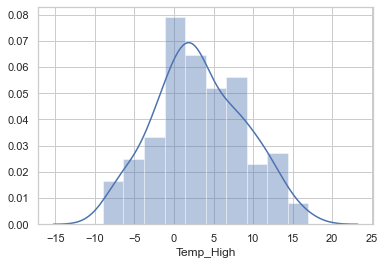

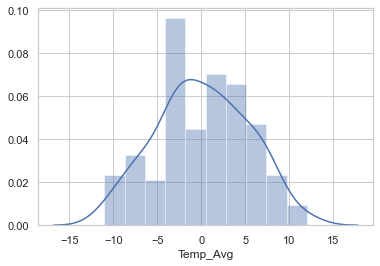

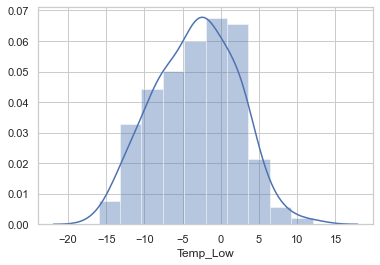

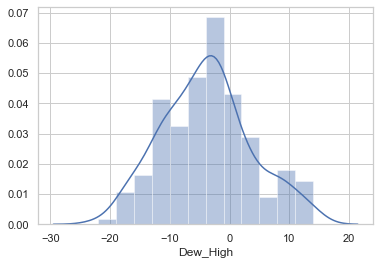

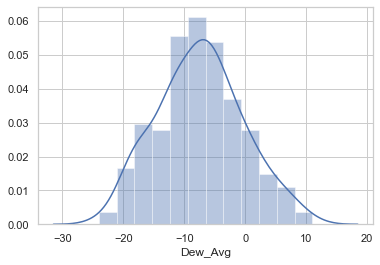

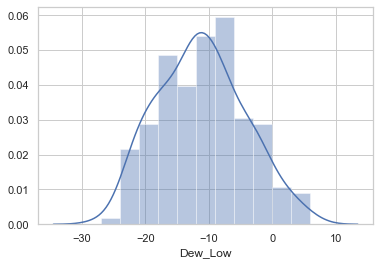

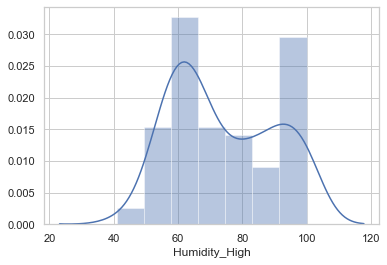

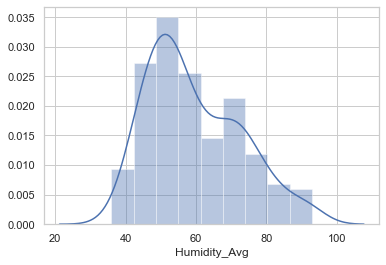

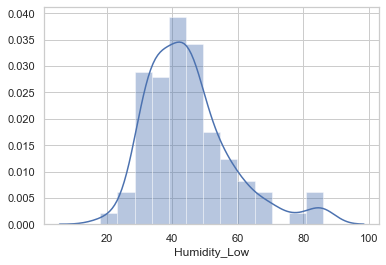

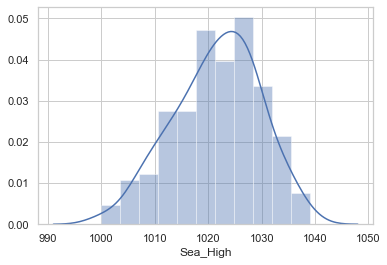

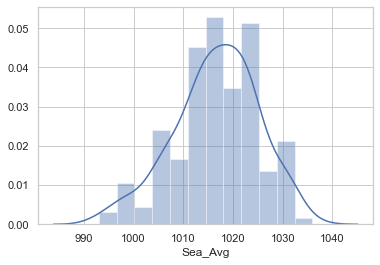

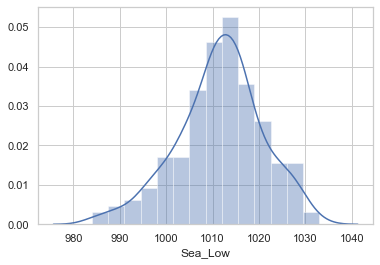

C:\Users\Saurabh Tayal\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


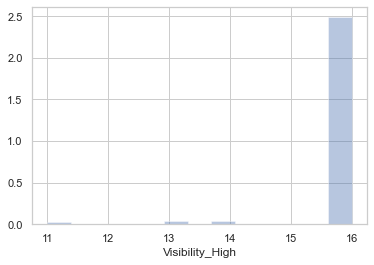

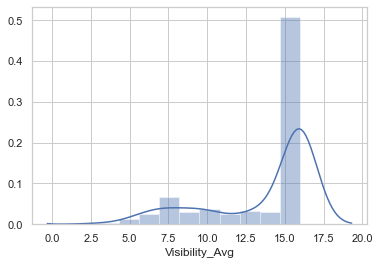

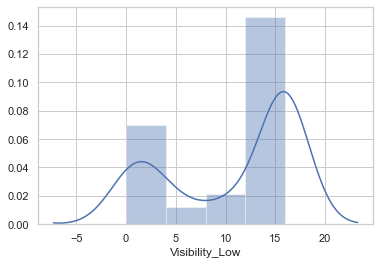

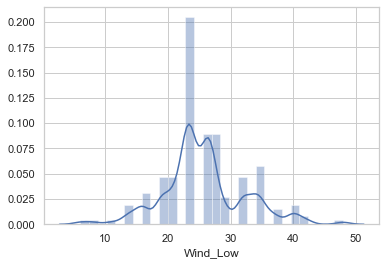

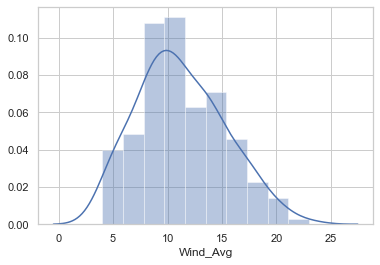

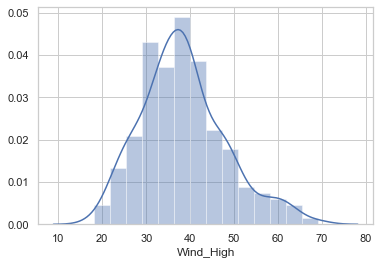

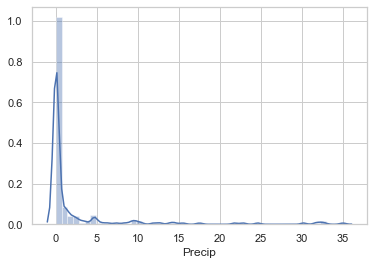

In [99]:
for i in weather.columns[2:]:
    sns.distplot(weather.loc[weather['Month'] == 1, i])
    plt.show()

In [100]:
df2 = weather.groupby(['Year', 'Month']).median().reset_index()
df2.head()

,Year,Month,Temp_High,Temp_Avg,Temp_Low,Dew_High,Dew_Avg,Dew_Low,Humidity_High,Humidity_Avg,Humidity_Low,Sea_High,Sea_Avg,Sea_Low,Visibility_High,Visibility_Avg,Visibility_Low,Wind_Low,Wind_Avg,Wind_High,Precip
0,2009,1,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,1015.0,1009.0,16.0,16.0,16.0,26.0,11.0,39.0,0.0
1,2009,2,7.0,3.0,-2.0,-2.5,-6.5,-12.0,65.0,50.0,37.0,1023.0,1017.0,1013.0,16.0,16.0,16.0,26.5,12.0,40.0,0.0
2,2009,3,11.0,7.0,3.0,1.0,-1.0,-6.0,70.0,56.0,39.0,1026.0,1022.0,1019.0,16.0,16.0,14.0,27.0,12.0,39.0,0.0
3,2009,4,15.5,11.5,7.0,7.5,2.5,-2.0,72.0,54.5,31.0,1021.5,1016.0,1012.5,16.0,16.0,16.0,26.5,10.5,39.0,0.0
4,2009,5,21.0,17.0,12.0,14.0,11.0,7.0,93.0,69.0,46.0,1021.0,1017.0,1014.0,16.0,15.0,11.0,21.0,8.0,32.0,0.0


In [101]:
df2.shape

(72, 21)

In [102]:
weather_data = df2.merge(df, on = ['Year', 'Month'])
weather_data.head()

,Year,Month,Temp_High,Temp_Avg,Temp_Low,Dew_High,Dew_Avg,Dew_Low,Humidity_High,Humidity_Avg,Humidity_Low,Sea_High,Sea_Avg,Sea_Low,Visibility_High,Visibility_Avg,Visibility_Low,Wind_Low,Wind_Avg,Wind_High,Precip,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Normal,Rain,"Rain , Snow",Snow,Thunderstorm
0,2009,1,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,1015.0,1009.0,16.0,16.0,16.0,26.0,11.0,39.0,0.0,0.0,0.0,2.0,2.0,21.0,3.0,0.0,3.0,0.0
1,2009,2,7.0,3.0,-2.0,-2.5,-6.5,-12.0,65.0,50.0,37.0,1023.0,1017.0,1013.0,16.0,16.0,16.0,26.5,12.0,40.0,0.0,0.0,0.0,0.0,1.0,22.0,4.0,1.0,0.0,0.0
2,2009,3,11.0,7.0,3.0,1.0,-1.0,-6.0,70.0,56.0,39.0,1026.0,1022.0,1019.0,16.0,16.0,14.0,27.0,12.0,39.0,0.0,1.0,0.0,0.0,2.0,21.0,7.0,0.0,0.0,0.0
3,2009,4,15.5,11.5,7.0,7.5,2.5,-2.0,72.0,54.5,31.0,1021.5,1016.0,1012.5,16.0,16.0,16.0,26.5,10.5,39.0,0.0,0.0,1.0,0.0,0.0,18.0,11.0,0.0,0.0,0.0
4,2009,5,21.0,17.0,12.0,14.0,11.0,7.0,93.0,69.0,46.0,1021.0,1017.0,1014.0,16.0,15.0,11.0,21.0,8.0,32.0,0.0,0.0,4.0,0.0,0.0,17.0,10.0,0.0,0.0,0.0


In [103]:
weather_data.shape

(72, 30)

In [104]:
train = train.merge(weather_data, on = ['Year', 'Month'], how = 'left')
test = test.merge(weather_data, on = ['Year', 'Month'], how = 'left')

In [105]:
train

,Year,Month,ProductCategory,Sales,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports,Temp_High,Temp_Avg,Temp_Low,Dew_High,Dew_Avg,Dew_Low,Humidity_High,Humidity_Avg,Humidity_Low,Sea_High,Sea_Avg,Sea_Low,Visibility_High,Visibility_Avg,Visibility_Low,Wind_Low,Wind_Avg,Wind_High,Precip,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Normal,Rain,"Rain , Snow",Snow,Thunderstorm
0,2009,1,WomenClothing,1755.0,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,1015.0,1009.0,16.0,16.0,16.0,26.0,11.0,39.0,0.00,0.0,0.0,2.0,2.0,21.0,3.0,0.0,3.0,0.0
1,2009,1,MenClothing,524.0,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,1015.0,1009.0,16.0,16.0,16.0,26.0,11.0,39.0,0.00,0.0,0.0,2.0,2.0,21.0,3.0,0.0,3.0,0.0
2,2009,1,OtherClothing,936.0,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55,1.0,-2.0,-5.0,-5.0,-10.0,-13.0,69.0,54.0,39.0,1022.0,1015.0,1009.0,16.0,16.0,16.0,26.0,11.0,39.0,0.00,0.0,0.0,2.0,2.0,21.0,3.0,0.0,3.0,0.0
3,2009,2,WomenClothing,1729.0,1.0,1.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.10,7.0,3.0,-2.0,-2.5,-6.5,-12.0,65.0,50.0,37.0,1023.0,1017.0,1013.0,16.0,16.0,16.0,26.5,12.0,40.0,0.00,0.0,0.0,0.0,1.0,22.0,4.0,1.0,0.0,0.0
4,2009,2,MenClothing,496.0,1.0,1.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.10,7.0,3.0,-2.0,-2.5,-6.5,-12.0,65.0,50.0,37.0,1023.0,1017.0,1013.0,16.0,16.0,16.0,26.5,12.0,40.0,0.00,0.0,0.0,0.0,1.0,22.0,4.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2013,11,MenClothing,798.0,1.0,2.0,17053.738107,15841.758762,257.377,6.9,11.85,10.22,24.11,0.8465,-5.26,10.136,7.582,790,12.479,3.58,9.65,11.5,7.0,2.5,1.5,-3.0,-7.0,65.5,52.0,36.5,1027.0,1022.0,1014.5,16.0,16.0,16.0,24.0,10.0,37.0,0.00,0.0,0.0,0.0,1.0,20.0,8.0,1.0,0.0,0.0
176,2013,11,OtherClothing,1209.0,1.0,2.0,17053.738107,15841.758762,257.377,6.9,11.85,10.22,24.11,0.8465,-5.26,10.136,7.582,790,12.479,3.58,9.65,11.5,7.0,2.5,1.5,-3.0,-7.0,65.5,52.0,36.5,1027.0,1022.0,1014.5,16.0,16.0,16.0,24.0,10.0,37.0,0.00,0.0,0.0,0.0,1.0,20.0,8.0,1.0,0.0,0.0
177,2013,12,WomenClothing,4865.0,3.0,3.0,17061.071077,15810.410182,257.284,6.7,11.85,10.22,24.30,0.8749,3.35,10.136,7.582,788,12.443,3.58,9.65,5.0,2.0,-1.0,-1.0,-4.0,-8.0,77.0,64.0,43.0,1023.0,1019.0,1015.0,16.0,16.0,13.0,24.0,10.0,40.0,0.03,0.0,1.0,2.0,1.0,20.0,5.0,2.0,0.0,0.0
178,2013,12,MenClothing,1085.0,3.0,3.0,17061.071077,15810.410182,257.284,6.7,11.85,10.22,24.30,0.8749,3.35,10.136,7.582,788,12.443,3.58,9.65,5.0,2.0,-1.0,-1.0,-4.0,-8.0,77.0,64.0,43.0,1023.0,1019.0,1015.0,16.0,16.0,13.0,24.0,10.0,40.0,0.03,0.0,1.0,2.0,1.0,20.0,5.0,2.0,0.0,0.0


In [106]:
test

,Year,Month,ProductCategory,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports,Temp_High,Temp_Avg,Temp_Low,Dew_High,Dew_Avg,Dew_Low,Humidity_High,Humidity_Avg,Humidity_Low,Sea_High,Sea_Avg,Sea_Low,Visibility_High,Visibility_Avg,Visibility_Low,Wind_Low,Wind_Avg,Wind_High,Precip,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Normal,Rain,"Rain , Snow",Snow,Thunderstorm
0,2014,1,WomenClothing,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.580,9.750,1.0,-2.5,-6.5,-6.5,-10.5,-16.0,75.0,59.5,42.0,1029.0,1023.25,1015.5,16.0,16.0,16.0,23.0,8.5,38.0,0.00,0.0,3.0,0.0,1.0,20.0,2.0,1.0,3.0,0.0
1,2014,1,MenClothing,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.580,9.750,1.0,-2.5,-6.5,-6.5,-10.5,-16.0,75.0,59.5,42.0,1029.0,1023.25,1015.5,16.0,16.0,16.0,23.0,8.5,38.0,0.00,0.0,3.0,0.0,1.0,20.0,2.0,1.0,3.0,0.0
2,2014,1,OtherClothing,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.580,9.750,1.0,-2.5,-6.5,-6.5,-10.5,-16.0,75.0,59.5,42.0,1029.0,1023.25,1015.5,16.0,16.0,16.0,23.0,8.5,38.0,0.00,0.0,3.0,0.0,1.0,20.0,2.0,1.0,3.0,0.0
3,2014,2,WomenClothing,1.0,1.0,17028.586348,15762.598920,259.019,6.7,11.83,10.09,24.58,0.9405,3.40,10.206,7.465,807,12.551,3.580,9.750,2.0,-0.5,-4.0,-3.5,-7.5,-11.5,78.5,56.0,39.0,1024.0,1017.00,1013.5,16.0,15.0,10.0,25.0,9.0,42.0,0.00,0.0,1.0,4.0,3.0,17.0,2.0,0.0,1.0,0.0
4,2014,2,MenClothing,1.0,1.0,17028.586348,15762.598920,259.019,6.7,11.83,10.09,24.58,0.9405,3.40,10.206,7.465,807,12.551,3.580,9.750,2.0,-0.5,-4.0,-3.5,-7.5,-11.5,78.5,56.0,39.0,1024.0,1017.00,1013.5,16.0,15.0,10.0,25.0,9.0,42.0,0.00,0.0,1.0,4.0,3.0,17.0,2.0,0.0,1.0,0.0
5,2014,2,OtherClothing,1.0,1.0,17028.586348,15762.598920,259.019,6.7,11.83,10.09,24.58,0.9405,3.40,10.206,7.465,807,12.551,3.580,9.750,2.0,-0.5,-4.0,-3.5,-7.5,-11.5,78.5,56.0,39.0,1024.0,1017.00,1013.5,16.0,15.0,10.0,25.0,9.0,42.0,0.00,0.0,1.0,4.0,3.0,17.0,2.0,0.0,1.0,0.0
6,2014,3,WomenClothing,1.0,0.0,17109.777026,15804.519068,259.971,6.7,11.83,10.09,24.50,0.9695,3.08,10.206,7.465,807,12.551,3.580,9.950,6.0,2.0,-2.0,-5.0,-10.0,-16.0,54.0,42.0,27.0,1022.0,1017.00,1013.0,16.0,16.0,16.0,26.0,11.0,40.0,0.00,0.0,0.0,0.0,0.0,23.0,6.0,0.0,2.0,0.0
7,2014,3,MenClothing,1.0,0.0,17109.777026,15804.519068,259.971,6.7,11.83,10.09,24.50,0.9695,3.08,10.206,7.465,807,12.551,3.580,9.950,6.0,2.0,-2.0,-5.0,-10.0,-16.0,54.0,42.0,27.0,1022.0,1017.00,1013.0,16.0,16.0,16.0,26.0,11.0,40.0,0.00,0.0,0.0,0.0,0.0,23.0,6.0,0.0,2.0,0.0
8,2014,3,OtherClothing,1.0,0.0,17109.777026,15804.519068,259.971,6.7,11.83,10.09,24.50,0.9695,3.08,10.206,7.465,807,12.551,3.580,9.950,6.0,2.0,-2.0,-5.0,-10.0,-16.0,54.0,42.0,27.0,1022.0,1017.00,1013.0,16.0,16.0,16.0,26.0,11.0,40.0,0.00,0.0,0.0,0.0,0.0,23.0,6.0,0.0,2.0,0.0
9,2014,4,WomenClothing,2.0,0.0,17208.864684,15870.178053,259.985,6.2,11.83,10.09,24.40,0.9420,-2.84,10.206,7.465,787,12.234,3.580,9.975,16.0,12.0,6.0,4.0,0.0,-4.0,70.0,50.5,32.5,1020.0,1017.00,1012.5,16.0,16.0,16.0,26.0,9.5,37.0,0.00,0.0,1.0,0.0,0.0,18.0,8.0,3.0,0.0,0.0


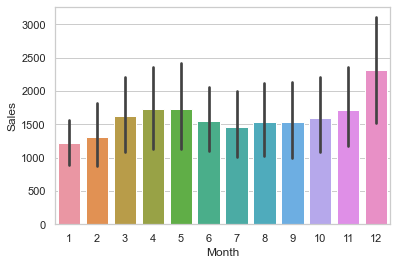

In [107]:
sns.barplot(x = 'Month', y = 'Sales', data = train)
plt.show()

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               180 non-null    int64  
 1   Month              180 non-null    int64  
 2   ProductCategory    180 non-null    object 
 3   Sales              180 non-null    float64
 4   Events             180 non-null    float64
 5   Federal_Holidays   180 non-null    float64
 6   Nominal_GDP        180 non-null    float64
 7   Real_GDP           180 non-null    float64
 8   CPI                180 non-null    float64
 9   Unemp_Rate         180 non-null    float64
 10  Rate_CreditCard    180 non-null    float64
 11  Rate_PersonalLoan  180 non-null    float64
 12  Wages              180 non-null    float64
 13  Cotton_Price       180 non-null    float64
 14  Change             180 non-null    float64
 15  Upland_Planted     180 non-null    float64
 16  Upland_Harvested   180 non

In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               36 non-null     int64  
 1   Month              36 non-null     int64  
 2   ProductCategory    36 non-null     object 
 3   Events             36 non-null     float64
 4   Federal_Holidays   36 non-null     float64
 5   Nominal_GDP        36 non-null     float64
 6   Real_GDP           36 non-null     float64
 7   CPI                36 non-null     float64
 8   Unemp_Rate         36 non-null     float64
 9   Rate_CreditCard    36 non-null     float64
 10  Rate_PersonalLoan  36 non-null     float64
 11  Wages              36 non-null     float64
 12  Cotton_Price       36 non-null     float64
 13  Change             36 non-null     float64
 14  Upland_Planted     36 non-null     float64
 15  Upland_Harvested   36 non-null     float64
 16  Yield_Harvested    36 non-nu

In [111]:
train.to_csv('train_all_median.csv', index = False)
test.to_csv('test_all_median.csv', index = False)

In [340]:
train['Year'] = train['Year'] - 2014
test['Year'] = test['Year'] - 2014

In [341]:
train.head()

,Year,Month,ProductCategory,Sales,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports,Temp_High,Temp_Avg,Temp_Low,Dew_High,Dew_Avg,Dew_Low,Humidity_High,Humidity_Avg,Humidity_Low,Sea_High,Sea_Avg,Sea_Low,Visibility_High,Visibility_Avg,Visibility_Low,Wind_Low,Wind_Avg,Wind_High,Precip,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Normal,Rain,"Rain , Snow",Snow,Thunderstorm
0,-5,1,WomenClothing,1755.0,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,42.322581,1021.290323,1015.967742,1010.516129,16.0,14.000000,11.451613,27.000000,12.000000,39.322581,2.445806,0.0,0.0,2.0,2.0,21.0,3.0,0.0,3.0,0.0
1,-5,1,MenClothing,524.0,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,42.322581,1021.290323,1015.967742,1010.516129,16.0,14.000000,11.451613,27.000000,12.000000,39.322581,2.445806,0.0,0.0,2.0,2.0,21.0,3.0,0.0,3.0,0.0
2,-5,1,OtherClothing,936.0,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,42.322581,1021.290323,1015.967742,1010.516129,16.0,14.000000,11.451613,27.000000,12.000000,39.322581,2.445806,0.0,0.0,2.0,2.0,21.0,3.0,0.0,3.0,0.0
3,-5,2,WomenClothing,1729.0,1.0,1.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.10,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,69.535714,54.000000,38.107143,1021.714286,1017.071429,1012.464286,16.0,15.178571,13.285714,27.928571,12.214286,41.642857,0.782500,0.0,0.0,0.0,1.0,22.0,4.0,1.0,0.0,0.0
4,-5,2,MenClothing,496.0,1.0,1.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.10,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,69.535714,54.000000,38.107143,1021.714286,1017.071429,1012.464286,16.0,15.178571,13.285714,27.928571,12.214286,41.642857,0.782500,0.0,0.0,0.0,1.0,22.0,4.0,1.0,0.0,0.0


In [342]:
test.head()

,Year,Month,ProductCategory,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports,Temp_High,Temp_Avg,Temp_Low,Dew_High,Dew_Avg,Dew_Low,Humidity_High,Humidity_Avg,Humidity_Low,Sea_High,Sea_Avg,Sea_Low,Visibility_High,Visibility_Avg,Visibility_Low,Wind_Low,Wind_Avg,Wind_High,Precip,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Normal,Rain,"Rain , Snow",Snow,Thunderstorm
0,0,1,WomenClothing,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.58,9.75,1.733333,-1.766667,-5.700000,-5.166667,-9.400000,-13.833333,75.033333,59.433333,43.900000,1025.033333,1019.200000,1012.233333,15.90,13.866667,10.633333,22.700000,10.10,38.866667,2.000333,0.0,3.0,0.0,1.0,20.0,2.0,1.0,3.0,0.0
1,0,1,MenClothing,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.58,9.75,1.733333,-1.766667,-5.700000,-5.166667,-9.400000,-13.833333,75.033333,59.433333,43.900000,1025.033333,1019.200000,1012.233333,15.90,13.866667,10.633333,22.700000,10.10,38.866667,2.000333,0.0,3.0,0.0,1.0,20.0,2.0,1.0,3.0,0.0
2,0,1,OtherClothing,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.58,9.75,1.733333,-1.766667,-5.700000,-5.166667,-9.400000,-13.833333,75.033333,59.433333,43.900000,1025.033333,1019.200000,1012.233333,15.90,13.866667,10.633333,22.700000,10.10,38.866667,2.000333,0.0,3.0,0.0,1.0,20.0,2.0,1.0,3.0,0.0
3,0,2,WomenClothing,1.0,1.0,17028.586348,15762.598920,259.019,6.7,11.83,10.09,24.58,0.9405,3.40,10.206,7.465,807,12.551,3.58,9.75,3.285714,0.285714,-3.107143,-4.178571,-7.821429,-11.678571,74.892857,58.714286,42.035714,1022.321429,1016.964286,1011.964286,15.75,12.357143,8.535714,25.178571,10.25,41.392857,4.972857,0.0,1.0,4.0,3.0,17.0,2.0,0.0,1.0,0.0
4,0,2,MenClothing,1.0,1.0,17028.586348,15762.598920,259.019,6.7,11.83,10.09,24.58,0.9405,3.40,10.206,7.465,807,12.551,3.58,9.75,3.285714,0.285714,-3.107143,-4.178571,-7.821429,-11.678571,74.892857,58.714286,42.035714,1022.321429,1016.964286,1011.964286,15.75,12.357143,8.535714,25.178571,10.25,41.392857,4.972857,0.0,1.0,4.0,3.0,17.0,2.0,0.0,1.0,0.0


In [343]:
train = pd.get_dummies(train, columns = ['Month', 'ProductCategory'], drop_first = True)
test = pd.get_dummies(test, columns = ['Month', 'ProductCategory'], drop_first = True)

In [344]:
train.head()

,Year,Sales,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports,Temp_High,Temp_Avg,Temp_Low,Dew_High,Dew_Avg,Dew_Low,Humidity_High,Humidity_Avg,Humidity_Low,Sea_High,Sea_Avg,Sea_Low,Visibility_High,Visibility_Avg,Visibility_Low,Wind_Low,Wind_Avg,Wind_High,Precip,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Normal,Rain,"Rain , Snow",Snow,Thunderstorm,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,ProductCategory_OtherClothing,ProductCategory_WomenClothing
0,-5,1755.0,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,42.322581,1021.290323,1015.967742,1010.516129,16.0,14.000000,11.451613,27.000000,12.000000,39.322581,2.445806,0.0,0.0,2.0,2.0,21.0,3.0,0.0,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-5,524.0,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,42.322581,1021.290323,1015.967742,1010.516129,16.0,14.000000,11.451613,27.000000,12.000000,39.322581,2.445806,0.0,0.0,2.0,2.0,21.0,3.0,0.0,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-5,936.0,0.0,3.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,0.5770,4.02,9.296,7.559,799,12.589,4.17,11.55,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,42.322581,1021.290323,1015.967742,1010.516129,16.0,14.000000,11.451613,27.000000,12.000000,39.322581,2.445806,0.0,0.0,2.0,2.0,21.0,3.0,0.0,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,-5,1729.0,1.0,1.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.10,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,69.535714,54.000000,38.107143,1021.714286,1017.071429,1012.464286,16.0,15.178571,13.285714,27.928571,12.214286,41.642857,0.782500,0.0,0.0,0.0,1.0,22.0,4.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,-5,496.0,1.0,1.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,0.5521,-4.32,9.296,7.559,799,12.589,3.87,11.10,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,69.535714,54.000000,38.107143,1021.714286,1017.071429,1012.464286,16.0,15.178571,13.285714,27.928571,12.214286,41.642857,0.782500,0.0,0.0,0.0,1.0,22.0,4.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [345]:
test.head()

,Year,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports,Temp_High,Temp_Avg,Temp_Low,Dew_High,Dew_Avg,Dew_Low,Humidity_High,Humidity_Avg,Humidity_Low,Sea_High,Sea_Avg,Sea_Low,Visibility_High,Visibility_Avg,Visibility_Low,Wind_Low,Wind_Avg,Wind_High,Precip,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Normal,Rain,"Rain , Snow",Snow,Thunderstorm,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,ProductCategory_OtherClothing,ProductCategory_WomenClothing
0,0,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.58,9.75,1.733333,-1.766667,-5.700000,-5.166667,-9.400000,-13.833333,75.033333,59.433333,43.900000,1025.033333,1019.200000,1012.233333,15.90,13.866667,10.633333,22.700000,10.10,38.866667,2.000333,0.0,3.0,0.0,1.0,20.0,2.0,1.0,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.58,9.75,1.733333,-1.766667,-5.700000,-5.166667,-9.400000,-13.833333,75.033333,59.433333,43.900000,1025.033333,1019.200000,1012.233333,15.90,13.866667,10.633333,22.700000,10.10,38.866667,2.000333,0.0,3.0,0.0,1.0,20.0,2.0,1.0,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,3.0,16955.608626,15705.972667,259.596,6.6,11.85,10.22,24.35,0.9096,3.97,10.206,7.465,807,12.551,3.58,9.75,1.733333,-1.766667,-5.700000,-5.166667,-9.400000,-13.833333,75.033333,59.433333,43.900000,1025.033333,1019.200000,1012.233333,15.90,13.866667,10.633333,22.700000,10.10,38.866667,2.000333,0.0,3.0,0.0,1.0,20.0,2.0,1.0,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1.0,1.0,17028.586348,15762.598920,259.019,6.7,11.83,10.09,24.58,0.9405,3.40,10.206,7.465,807,12.551,3.58,9.75,3.285714,0.285714,-3.107143,-4.178571,-7.821429,-11.678571,74.892857,58.714286,42.035714,1022.321429,1016.964286,1011.964286,15.75,12.357143,8.535714,25.178571,10.25,41.392857,4.972857,0.0,1.0,4.0,3.0,17.0,2.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1.0,1.0,17028.586348,15762.598920,259.019,6.7,11.83,10.09,24.58,0.9405,3.40,10.206,7.465,807,12.551,3.58,9.75,3.285714,0.285714,-3.107143,-4.178571,-7.821429,-11.678571,74.892857,58.714286,42.035714,1022.321429,1016.964286,1011.964286,15.75,12.357143,8.535714,25.178571,10.25,41.392857,4.972857,0.0,1.0,4.0,3.0,17.0,2.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [346]:
train.to_csv('train_dummy_final.csv', index = False)
test.to_csv('test_dummy_final.csv', index = False)

In [347]:
X_train = train.drop('Sales', 1)
y_train = train['Sales']
X_test = test

In [348]:
y_train_log = np.log(y_train)

In [349]:
ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)

In [350]:
X_train_scaled.head()

,Year,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports,Temp_High,Temp_Avg,Temp_Low,Dew_High,Dew_Avg,Dew_Low,Humidity_High,Humidity_Avg,Humidity_Low,Sea_High,Sea_Avg,Sea_Low,Visibility_High,Visibility_Avg,Visibility_Low,Wind_Low,Wind_Avg,Wind_High,Precip,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Normal,Rain,"Rain , Snow",Snow,Thunderstorm,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,ProductCategory_OtherClothing,ProductCategory_WomenClothing
0,-1.414214,-1.063410,1.717911,-1.356783,-1.456054,-1.803351,-0.947473,-0.956059,1.799090,-1.520639,-1.087254,0.357995,-0.99312,-1.168809,0.125973,-1.051372,3.978623,-0.109905,-1.818354,-1.799562,-1.778527,-1.749912,-1.751915,-1.750437,-1.227609,-0.934442,-0.570120,0.588624,0.084808,-0.590389,0.756966,0.146405,0.614829,1.091576,1.257299,0.812422,-0.480800,-0.428499,-1.028992,3.780756,1.473935,0.499525,-1.379827,-0.466252,1.586474,-0.130189,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,1.414214
1,-1.414214,-1.063410,1.717911,-1.356783,-1.456054,-1.803351,-0.947473,-0.956059,1.799090,-1.520639,-1.087254,0.357995,-0.99312,-1.168809,0.125973,-1.051372,3.978623,-0.109905,-1.818354,-1.799562,-1.778527,-1.749912,-1.751915,-1.750437,-1.227609,-0.934442,-0.570120,0.588624,0.084808,-0.590389,0.756966,0.146405,0.614829,1.091576,1.257299,0.812422,-0.480800,-0.428499,-1.028992,3.780756,1.473935,0.499525,-1.379827,-0.466252,1.586474,-0.130189,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,-0.707107
2,-1.414214,-1.063410,1.717911,-1.356783,-1.456054,-1.803351,-0.947473,-0.956059,1.799090,-1.520639,-1.087254,0.357995,-0.99312,-1.168809,0.125973,-1.051372,3.978623,-0.109905,-1.818354,-1.799562,-1.778527,-1.749912,-1.751915,-1.750437,-1.227609,-0.934442,-0.570120,0.588624,0.084808,-0.590389,0.756966,0.146405,0.614829,1.091576,1.257299,0.812422,-0.480800,-0.428499,-1.028992,3.780756,1.473935,0.499525,-1.379827,-0.466252,1.586474,-0.130189,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,1.414214,-0.707107
3,-1.414214,0.096674,-0.156174,-1.395944,-1.550379,-1.635694,-0.392313,0.241403,0.748985,-1.260352,-1.151090,-0.664555,-0.99312,-1.168809,0.125973,-1.051372,2.165074,-0.365719,-1.131904,-1.234187,-1.334144,-1.320196,-1.357616,-1.382713,-1.573152,-1.472215,-1.200227,0.714550,0.462549,0.107931,0.756966,1.447747,1.760697,1.374359,1.359193,1.338401,-1.160801,-0.428499,-1.028992,-0.420084,0.512673,0.852131,-1.057689,1.398757,-0.438812,-0.130189,3.316625,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,1.414214
4,-1.414214,0.096674,-0.156174,-1.395944,-1.550379,-1.635694,-0.392313,0.241403,0.748985,-1.260352,-1.151090,-0.664555,-0.99312,-1.168809,0.125973,-1.051372,2.165074,-0.365719,-1.131904,-1.234187,-1.334144,-1.320196,-1.357616,-1.382713,-1.573152,-1.472215,-1.200227,0.714550,0.462549,0.107931,0.756966,1.447747,1.760697,1.374359,1.359193,1.338401,-1.160801,-0.428499,-1.028992,-0.420084,0.512673,0.852131,-1.057689,1.398757,-0.438812,-0.130189,3.316625,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,-0.707107


In [351]:
X_test_scaled.head()

,Year,Events,Federal_Holidays,Nominal_GDP,Real_GDP,CPI,Unemp_Rate,Rate_CreditCard,Rate_PersonalLoan,Wages,Cotton_Price,Change,Upland_Planted,Upland_Harvested,Yield_Harvested,Production,Mill_Use,Exports,Temp_High,Temp_Avg,Temp_Low,Dew_High,Dew_Avg,Dew_Low,Humidity_High,Humidity_Avg,Humidity_Low,Sea_High,Sea_Avg,Sea_Low,Visibility_High,Visibility_Avg,Visibility_Low,Wind_Low,Wind_Avg,Wind_High,Precip,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Normal,Rain,"Rain , Snow",Snow,Thunderstorm,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,ProductCategory_OtherClothing,ProductCategory_WomenClothing
0,2.12132,-1.063410,1.717911,1.691501,1.541286,1.679290,-2.279856,-1.185360,-1.485853,2.000895,-0.234573,0.351864,-0.504925,-1.246582,0.409856,-1.068776,0.411978,-1.133161,-1.708983,-1.761337,-1.824106,-1.639882,-1.695390,-1.732562,-0.724512,-0.601263,-0.334334,1.700379,1.191060,0.025146,-0.002987,-0.000818,0.103603,-0.217929,0.353840,0.709072,-0.66292,-0.428499,0.685994,-0.420084,0.512673,0.146919,-1.701966,1.398757,1.586474,-0.130189,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,1.414214
1,2.12132,-1.063410,1.717911,1.691501,1.541286,1.679290,-2.279856,-1.185360,-1.485853,2.000895,-0.234573,0.351864,-0.504925,-1.246582,0.409856,-1.068776,0.411978,-1.133161,-1.708983,-1.761337,-1.824106,-1.639882,-1.695390,-1.732562,-0.724512,-0.601263,-0.334334,1.700379,1.191060,0.025146,-0.002987,-0.000818,0.103603,-0.217929,0.353840,0.709072,-0.66292,-0.428499,0.685994,-0.420084,0.512673,0.146919,-1.701966,1.398757,1.586474,-0.130189,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,-0.707107
2,2.12132,-1.063410,1.717911,1.691501,1.541286,1.679290,-2.279856,-1.185360,-1.485853,2.000895,-0.234573,0.351864,-0.504925,-1.246582,0.409856,-1.068776,0.411978,-1.133161,-1.708983,-1.761337,-1.824106,-1.639882,-1.695390,-1.732562,-0.724512,-0.601263,-0.334334,1.700379,1.191060,0.025146,-0.002987,-0.000818,0.103603,-0.217929,0.353840,0.709072,-0.66292,-0.428499,0.685994,-0.420084,0.512673,0.146919,-1.701966,1.398757,1.586474,-0.130189,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,1.414214,-0.707107
3,2.12132,0.096674,-0.156174,1.779294,1.671955,1.602575,-2.168824,-1.210838,-1.835888,2.353048,-0.155355,0.281978,-0.504925,-1.246582,0.409856,-1.068776,0.411978,-1.133161,-1.537724,-1.523678,-1.510979,-1.522993,-1.518079,-1.501457,-0.746197,-0.716525,-0.613000,0.894885,0.425879,-0.071295,-1.142915,-1.667587,-1.206899,0.536885,0.425166,1.281729,0.55232,-0.428499,-0.457330,7.981596,2.435197,-0.910898,-1.701966,-0.466252,0.236283,-0.130189,3.316625,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,1.414214
4,2.12132,0.096674,-0.156174,1.779294,1.671955,1.602575,-2.168824,-1.210838,-1.835888,2.353048,-0.155355,0.281978,-0.504925,-1.246582,0.409856,-1.068776,0.411978,-1.133161,-1.537724,-1.523678,-1.510979,-1.522993,-1.518079,-1.501457,-0.746197,-0.716525,-0.613000,0.894885,0.425879,-0.071295,-1.142915,-1.667587,-1.206899,0.536885,0.425166,1.281729,0.55232,-0.428499,-0.457330,7.981596,2.435197,-0.910898,-1.701966,-0.466252,0.236283,-0.130189,3.316625,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.707107,-0.707107


In [364]:
X_train_scaled.shape

(180, 59)

In [361]:
rfr = RandomForestRegressor(random_state = 0)
cbr = CatBoostRegressor(random_state = 0)
gbr = GradientBoostingRegressor(random_state = 0)
lgbmr = lgb.LGBMRegressor(random_state = 0)
xgbr = XGBRegressor(random_state = 0)
xgbrfr = XGBRFRegressor(random_state = 0)
votreg = VotingRegressor(estimators = [('rfr', rfr), ('cbr', cbr), ('gbr', gbr), ('xgbr', xgbr), ('xgbrfr', xgbrfr)])

#### RF

In [365]:
rfr.fit(X_train_scaled, y_train_log)
rfr.score(X_train_scaled, y_train_log)

0.9963254623208547

##### Tuning RF

In [367]:
rfr = RandomForestRegressor(random_state = 0)
params = {'n_estimators' : sp_randint(50, 200),
         'max_features' : sp_randint(1, 59),
         'max_depth' : sp_randint(2, 50),
         'min_samples_leaf' : sp_randint(1, 25),
         'min_samples_split' : sp_randint(2, 25),
         'oob_score' : [False, True]}
rsearch = RandomizedSearchCV(rfr, param_distributions=params, cv = 5, n_jobs = -1, random_state = 0, n_iter = 100)
rsearch.fit(X_train_scaled, y_train_log)
rsearch.best_params_

{'max_depth': 30,
 'max_features': 35,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 103,
 'oob_score': True}

#### Tuned RF

In [368]:
rfr = RandomForestRegressor(**rsearch.best_params_, random_state = 0)
rfr.fit(X_train_scaled, y_train_log)
rfr.score(X_train_scaled, y_train_log)

0.9961908033957283

#### CBR

In [369]:
cbr.fit(X_train_scaled, y_train_log)
cbr.score(X_train_scaled, y_train_log)

Learning rate set to 0.028763
0:	learn: 0.6628513	total: 5.25ms	remaining: 5.24s
1:	learn: 0.6492468	total: 8.18ms	remaining: 4.08s
2:	learn: 0.6379530	total: 10.8ms	remaining: 3.59s
3:	learn: 0.6269946	total: 14.2ms	remaining: 3.54s
4:	learn: 0.6166542	total: 17.3ms	remaining: 3.45s
5:	learn: 0.6057309	total: 20.4ms	remaining: 3.38s
6:	learn: 0.5955888	total: 23.8ms	remaining: 3.38s
7:	learn: 0.5846334	total: 27.2ms	remaining: 3.37s
8:	learn: 0.5735830	total: 30.5ms	remaining: 3.36s
9:	learn: 0.5637861	total: 33.1ms	remaining: 3.28s
10:	learn: 0.5534194	total: 35.7ms	remaining: 3.21s
11:	learn: 0.5428509	total: 38.2ms	remaining: 3.14s
12:	learn: 0.5327856	total: 40.7ms	remaining: 3.09s
13:	learn: 0.5235511	total: 43.7ms	remaining: 3.08s
14:	learn: 0.5137095	total: 46.5ms	remaining: 3.05s
15:	learn: 0.5048803	total: 48.9ms	remaining: 3.01s
16:	learn: 0.4967115	total: 51.6ms	remaining: 2.98s
17:	learn: 0.4893848	total: 54.6ms	remaining: 2.98s
18:	learn: 0.4830446	total: 57.5ms	remaining

184:	learn: 0.0655271	total: 485ms	remaining: 2.13s
185:	learn: 0.0651044	total: 488ms	remaining: 2.13s
186:	learn: 0.0645490	total: 491ms	remaining: 2.13s
187:	learn: 0.0639966	total: 495ms	remaining: 2.14s
188:	learn: 0.0634191	total: 498ms	remaining: 2.13s
189:	learn: 0.0630692	total: 501ms	remaining: 2.13s
190:	learn: 0.0625152	total: 504ms	remaining: 2.13s
191:	learn: 0.0621722	total: 507ms	remaining: 2.13s
192:	learn: 0.0616649	total: 511ms	remaining: 2.13s
193:	learn: 0.0611727	total: 514ms	remaining: 2.13s
194:	learn: 0.0607615	total: 516ms	remaining: 2.13s
195:	learn: 0.0602395	total: 519ms	remaining: 2.13s
196:	learn: 0.0598500	total: 521ms	remaining: 2.12s
197:	learn: 0.0593782	total: 523ms	remaining: 2.12s
198:	learn: 0.0591043	total: 525ms	remaining: 2.11s
199:	learn: 0.0587569	total: 528ms	remaining: 2.11s
200:	learn: 0.0582925	total: 530ms	remaining: 2.11s
201:	learn: 0.0579604	total: 532ms	remaining: 2.1s
202:	learn: 0.0576552	total: 535ms	remaining: 2.1s
203:	learn: 0.

373:	learn: 0.0266760	total: 974ms	remaining: 1.63s
374:	learn: 0.0266328	total: 978ms	remaining: 1.63s
375:	learn: 0.0265761	total: 981ms	remaining: 1.63s
376:	learn: 0.0264922	total: 984ms	remaining: 1.63s
377:	learn: 0.0264072	total: 988ms	remaining: 1.63s
378:	learn: 0.0263176	total: 991ms	remaining: 1.62s
379:	learn: 0.0262373	total: 995ms	remaining: 1.62s
380:	learn: 0.0261272	total: 997ms	remaining: 1.62s
381:	learn: 0.0260763	total: 1s	remaining: 1.62s
382:	learn: 0.0259810	total: 1s	remaining: 1.62s
383:	learn: 0.0258766	total: 1s	remaining: 1.61s
384:	learn: 0.0258312	total: 1.01s	remaining: 1.61s
385:	learn: 0.0257471	total: 1.01s	remaining: 1.61s
386:	learn: 0.0256528	total: 1.01s	remaining: 1.6s
387:	learn: 0.0255557	total: 1.02s	remaining: 1.6s
388:	learn: 0.0255479	total: 1.02s	remaining: 1.6s
389:	learn: 0.0254597	total: 1.02s	remaining: 1.6s
390:	learn: 0.0253870	total: 1.02s	remaining: 1.59s
391:	learn: 0.0253374	total: 1.03s	remaining: 1.59s
392:	learn: 0.0252691	tot

543:	learn: 0.0163818	total: 1.45s	remaining: 1.21s
544:	learn: 0.0163244	total: 1.45s	remaining: 1.21s
545:	learn: 0.0162444	total: 1.45s	remaining: 1.21s
546:	learn: 0.0162293	total: 1.45s	remaining: 1.2s
547:	learn: 0.0161943	total: 1.45s	remaining: 1.2s
548:	learn: 0.0161700	total: 1.46s	remaining: 1.2s
549:	learn: 0.0161216	total: 1.46s	remaining: 1.19s
550:	learn: 0.0161177	total: 1.46s	remaining: 1.19s
551:	learn: 0.0160686	total: 1.46s	remaining: 1.19s
552:	learn: 0.0159974	total: 1.47s	remaining: 1.19s
553:	learn: 0.0159926	total: 1.47s	remaining: 1.18s
554:	learn: 0.0159421	total: 1.47s	remaining: 1.18s
555:	learn: 0.0158946	total: 1.47s	remaining: 1.18s
556:	learn: 0.0158567	total: 1.48s	remaining: 1.18s
557:	learn: 0.0158046	total: 1.48s	remaining: 1.17s
558:	learn: 0.0157317	total: 1.49s	remaining: 1.17s
559:	learn: 0.0157270	total: 1.49s	remaining: 1.17s
560:	learn: 0.0156853	total: 1.49s	remaining: 1.17s
561:	learn: 0.0155967	total: 1.49s	remaining: 1.16s
562:	learn: 0.0

734:	learn: 0.0097181	total: 2.09s	remaining: 752ms
735:	learn: 0.0097025	total: 2.09s	remaining: 750ms
736:	learn: 0.0096709	total: 2.09s	remaining: 748ms
737:	learn: 0.0096303	total: 2.1s	remaining: 745ms
738:	learn: 0.0095902	total: 2.1s	remaining: 742ms
739:	learn: 0.0095744	total: 2.1s	remaining: 739ms
740:	learn: 0.0095712	total: 2.11s	remaining: 737ms
741:	learn: 0.0095642	total: 2.11s	remaining: 734ms
742:	learn: 0.0095621	total: 2.11s	remaining: 731ms
743:	learn: 0.0095151	total: 2.12s	remaining: 728ms
744:	learn: 0.0094941	total: 2.12s	remaining: 726ms
745:	learn: 0.0094697	total: 2.12s	remaining: 723ms
746:	learn: 0.0094351	total: 2.13s	remaining: 721ms
747:	learn: 0.0094056	total: 2.13s	remaining: 719ms
748:	learn: 0.0093705	total: 2.13s	remaining: 716ms
749:	learn: 0.0093651	total: 2.15s	remaining: 716ms
750:	learn: 0.0093382	total: 2.15s	remaining: 713ms
751:	learn: 0.0093137	total: 2.15s	remaining: 710ms
752:	learn: 0.0092788	total: 2.15s	remaining: 707ms
753:	learn: 0.0

911:	learn: 0.0059150	total: 2.72s	remaining: 263ms
912:	learn: 0.0059000	total: 2.73s	remaining: 260ms
913:	learn: 0.0058815	total: 2.73s	remaining: 257ms
914:	learn: 0.0058613	total: 2.73s	remaining: 254ms
915:	learn: 0.0058505	total: 2.74s	remaining: 251ms
916:	learn: 0.0058399	total: 2.74s	remaining: 248ms
917:	learn: 0.0058243	total: 2.74s	remaining: 245ms
918:	learn: 0.0057985	total: 2.75s	remaining: 242ms
919:	learn: 0.0057727	total: 2.75s	remaining: 239ms
920:	learn: 0.0057689	total: 2.75s	remaining: 236ms
921:	learn: 0.0057572	total: 2.76s	remaining: 233ms
922:	learn: 0.0057484	total: 2.76s	remaining: 230ms
923:	learn: 0.0057379	total: 2.76s	remaining: 227ms
924:	learn: 0.0057162	total: 2.77s	remaining: 224ms
925:	learn: 0.0056918	total: 2.77s	remaining: 221ms
926:	learn: 0.0056824	total: 2.78s	remaining: 219ms
927:	learn: 0.0056584	total: 2.78s	remaining: 216ms
928:	learn: 0.0056383	total: 2.78s	remaining: 213ms
929:	learn: 0.0056293	total: 2.79s	remaining: 210ms
930:	learn: 

0.9999539967986149

#### GBR

In [370]:
gbr.fit(X_train_scaled, y_train_log)
gbr.score(X_train_scaled, y_train_log)

0.998228447562849

##### Tuning GBR

In [371]:
gbr = GradientBoostingRegressor(random_state = 0)

params = {'n_estimators' : sp_randint(50, 200),
          'max_features' : sp_randint(1, 59),
          'max_depth' : sp_randint(2, 50),
          'min_samples_leaf' : sp_randint(1, 25),
          'min_samples_split' : sp_randint(2, 25),
          'learning_rate' : sp_uniform(0, 1)}

rsearch_gbr = RandomizedSearchCV(gbr, param_distributions = params, n_jobs = -1,
                                 cv = 5, n_iter = 100, random_state = 0)

rsearch_gbr.fit(X_train_scaled, y_train_log)
print(rsearch_gbr.best_params_)

{'learning_rate': 0.25062272019388543, 'max_depth': 2, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 119}


###### Tuned GBR

In [373]:
gbr = GradientBoostingRegressor(**rsearch_gbr.best_params_, random_state = 0)
gbr.fit(X_train_scaled, y_train_log)
gbr.score(X_train_scaled, y_train_log)

0.9961649956815191

#### XGBR

In [374]:
xgbr.fit(X_train_scaled, y_train_log)
xgbr.score(X_train_scaled, y_train_log)

0.9999902802972387

#### XGBRFR

In [375]:
xgbrfr.fit(X_train_scaled, y_train_log)
xgbrfr.score(X_train_scaled, y_train_log)

0.9968501391199004

### VotReg

In [376]:
votreg.fit(X_train_scaled, y_train_log)
votreg.score(X_train_scaled, y_train_log)

Learning rate set to 0.028763
0:	learn: 0.6628513	total: 4.01ms	remaining: 4.01s
1:	learn: 0.6492468	total: 6.88ms	remaining: 3.43s
2:	learn: 0.6379530	total: 9.44ms	remaining: 3.14s
3:	learn: 0.6269946	total: 12.1ms	remaining: 3.01s
4:	learn: 0.6166542	total: 15ms	remaining: 2.99s
5:	learn: 0.6057309	total: 17.5ms	remaining: 2.9s
6:	learn: 0.5955888	total: 20ms	remaining: 2.84s
7:	learn: 0.5846334	total: 22.5ms	remaining: 2.79s
8:	learn: 0.5735830	total: 24.8ms	remaining: 2.73s
9:	learn: 0.5637861	total: 27.6ms	remaining: 2.74s
10:	learn: 0.5534194	total: 30.1ms	remaining: 2.71s
11:	learn: 0.5428509	total: 32.5ms	remaining: 2.68s
12:	learn: 0.5327856	total: 35ms	remaining: 2.66s
13:	learn: 0.5235511	total: 37.5ms	remaining: 2.64s
14:	learn: 0.5137095	total: 40.1ms	remaining: 2.63s
15:	learn: 0.5048803	total: 42.5ms	remaining: 2.61s
16:	learn: 0.4967115	total: 45ms	remaining: 2.6s
17:	learn: 0.4893848	total: 47.3ms	remaining: 2.58s
18:	learn: 0.4830446	total: 49.7ms	remaining: 2.56s
19

192:	learn: 0.0616649	total: 475ms	remaining: 1.98s
193:	learn: 0.0611727	total: 478ms	remaining: 1.99s
194:	learn: 0.0607615	total: 481ms	remaining: 1.98s
195:	learn: 0.0602395	total: 484ms	remaining: 1.98s
196:	learn: 0.0598500	total: 487ms	remaining: 1.98s
197:	learn: 0.0593782	total: 490ms	remaining: 1.98s
198:	learn: 0.0591043	total: 493ms	remaining: 1.98s
199:	learn: 0.0587569	total: 495ms	remaining: 1.98s
200:	learn: 0.0582925	total: 500ms	remaining: 1.99s
201:	learn: 0.0579604	total: 504ms	remaining: 1.99s
202:	learn: 0.0576552	total: 507ms	remaining: 1.99s
203:	learn: 0.0572210	total: 509ms	remaining: 1.99s
204:	learn: 0.0567298	total: 512ms	remaining: 1.98s
205:	learn: 0.0562437	total: 514ms	remaining: 1.98s
206:	learn: 0.0558292	total: 518ms	remaining: 1.98s
207:	learn: 0.0554600	total: 520ms	remaining: 1.98s
208:	learn: 0.0551265	total: 523ms	remaining: 1.98s
209:	learn: 0.0547897	total: 527ms	remaining: 1.98s
210:	learn: 0.0544907	total: 529ms	remaining: 1.98s
211:	learn: 

362:	learn: 0.0274662	total: 955ms	remaining: 1.68s
363:	learn: 0.0274307	total: 958ms	remaining: 1.67s
364:	learn: 0.0273228	total: 962ms	remaining: 1.67s
365:	learn: 0.0272572	total: 965ms	remaining: 1.67s
366:	learn: 0.0272199	total: 970ms	remaining: 1.67s
367:	learn: 0.0271384	total: 977ms	remaining: 1.68s
368:	learn: 0.0270202	total: 983ms	remaining: 1.68s
369:	learn: 0.0268937	total: 985ms	remaining: 1.68s
370:	learn: 0.0268094	total: 989ms	remaining: 1.68s
371:	learn: 0.0267337	total: 992ms	remaining: 1.68s
372:	learn: 0.0267045	total: 996ms	remaining: 1.67s
373:	learn: 0.0266760	total: 998ms	remaining: 1.67s
374:	learn: 0.0266328	total: 1s	remaining: 1.67s
375:	learn: 0.0265761	total: 1s	remaining: 1.67s
376:	learn: 0.0264922	total: 1.01s	remaining: 1.67s
377:	learn: 0.0264072	total: 1.01s	remaining: 1.66s
378:	learn: 0.0263176	total: 1.01s	remaining: 1.66s
379:	learn: 0.0262373	total: 1.02s	remaining: 1.66s
380:	learn: 0.0261272	total: 1.02s	remaining: 1.66s
381:	learn: 0.0260

525:	learn: 0.0172110	total: 1.44s	remaining: 1.3s
526:	learn: 0.0171122	total: 1.44s	remaining: 1.29s
527:	learn: 0.0171067	total: 1.45s	remaining: 1.29s
528:	learn: 0.0170353	total: 1.45s	remaining: 1.29s
529:	learn: 0.0169731	total: 1.45s	remaining: 1.29s
530:	learn: 0.0169135	total: 1.45s	remaining: 1.28s
531:	learn: 0.0169082	total: 1.46s	remaining: 1.28s
532:	learn: 0.0168348	total: 1.46s	remaining: 1.28s
533:	learn: 0.0167496	total: 1.47s	remaining: 1.28s
534:	learn: 0.0166776	total: 1.47s	remaining: 1.27s
535:	learn: 0.0166536	total: 1.47s	remaining: 1.27s
536:	learn: 0.0166135	total: 1.47s	remaining: 1.27s
537:	learn: 0.0165528	total: 1.47s	remaining: 1.27s
538:	learn: 0.0164871	total: 1.48s	remaining: 1.26s
539:	learn: 0.0164454	total: 1.48s	remaining: 1.26s
540:	learn: 0.0164425	total: 1.48s	remaining: 1.26s
541:	learn: 0.0164333	total: 1.48s	remaining: 1.25s
542:	learn: 0.0164216	total: 1.49s	remaining: 1.25s
543:	learn: 0.0163818	total: 1.49s	remaining: 1.25s
544:	learn: 0

729:	learn: 0.0098619	total: 2.26s	remaining: 837ms
730:	learn: 0.0098320	total: 2.27s	remaining: 835ms
731:	learn: 0.0098142	total: 2.27s	remaining: 831ms
732:	learn: 0.0097861	total: 2.27s	remaining: 829ms
733:	learn: 0.0097377	total: 2.28s	remaining: 825ms
734:	learn: 0.0097181	total: 2.28s	remaining: 822ms
735:	learn: 0.0097025	total: 2.28s	remaining: 819ms
736:	learn: 0.0096709	total: 2.29s	remaining: 816ms
737:	learn: 0.0096303	total: 2.29s	remaining: 813ms
738:	learn: 0.0095902	total: 2.29s	remaining: 810ms
739:	learn: 0.0095744	total: 2.29s	remaining: 807ms
740:	learn: 0.0095712	total: 2.3s	remaining: 803ms
741:	learn: 0.0095642	total: 2.3s	remaining: 800ms
742:	learn: 0.0095621	total: 2.3s	remaining: 796ms
743:	learn: 0.0095151	total: 2.3s	remaining: 793ms
744:	learn: 0.0094941	total: 2.31s	remaining: 790ms
745:	learn: 0.0094697	total: 2.31s	remaining: 786ms
746:	learn: 0.0094351	total: 2.31s	remaining: 783ms
747:	learn: 0.0094056	total: 2.31s	remaining: 780ms
748:	learn: 0.00

919:	learn: 0.0057727	total: 2.75s	remaining: 239ms
920:	learn: 0.0057689	total: 2.75s	remaining: 236ms
921:	learn: 0.0057572	total: 2.75s	remaining: 233ms
922:	learn: 0.0057484	total: 2.75s	remaining: 230ms
923:	learn: 0.0057379	total: 2.76s	remaining: 227ms
924:	learn: 0.0057162	total: 2.76s	remaining: 224ms
925:	learn: 0.0056918	total: 2.76s	remaining: 221ms
926:	learn: 0.0056824	total: 2.77s	remaining: 218ms
927:	learn: 0.0056584	total: 2.77s	remaining: 215ms
928:	learn: 0.0056383	total: 2.77s	remaining: 212ms
929:	learn: 0.0056293	total: 2.78s	remaining: 209ms
930:	learn: 0.0056075	total: 2.78s	remaining: 206ms
931:	learn: 0.0055969	total: 2.78s	remaining: 203ms
932:	learn: 0.0055741	total: 2.78s	remaining: 200ms
933:	learn: 0.0055555	total: 2.79s	remaining: 197ms
934:	learn: 0.0055441	total: 2.79s	remaining: 194ms
935:	learn: 0.0055229	total: 2.79s	remaining: 191ms
936:	learn: 0.0055117	total: 2.79s	remaining: 188ms
937:	learn: 0.0054906	total: 2.79s	remaining: 185ms
938:	learn: 

0.9991757133344503

### Test Prediction

In [377]:
pred = votreg.predict(X_test_scaled)

#### Submission Data 

In [378]:
kaggle = pd.read_csv('Kaggle_Submission_Format.csv')

In [379]:
kaggle['Sales(In ThousandDollars)'] = np.exp(pred)

In [380]:
kaggle.to_csv('Iteration_4_all_data_withoutPCA', index = False)
kaggle.head()

,Year,Sales(In ThousandDollars)
0,1,2699.416604
1,2,615.744322
2,3,1143.699030
3,4,2986.929615
4,5,603.536170
